In [129]:
import pandas as pd
import numpy as np

In [130]:
df=pd.read_csv("Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [132]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["NO", "YES"]])
df[["Outcome"]] = encoder.fit_transform(df[["Outcome"]])
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0


In [133]:
df.columns = df.columns.str.strip()


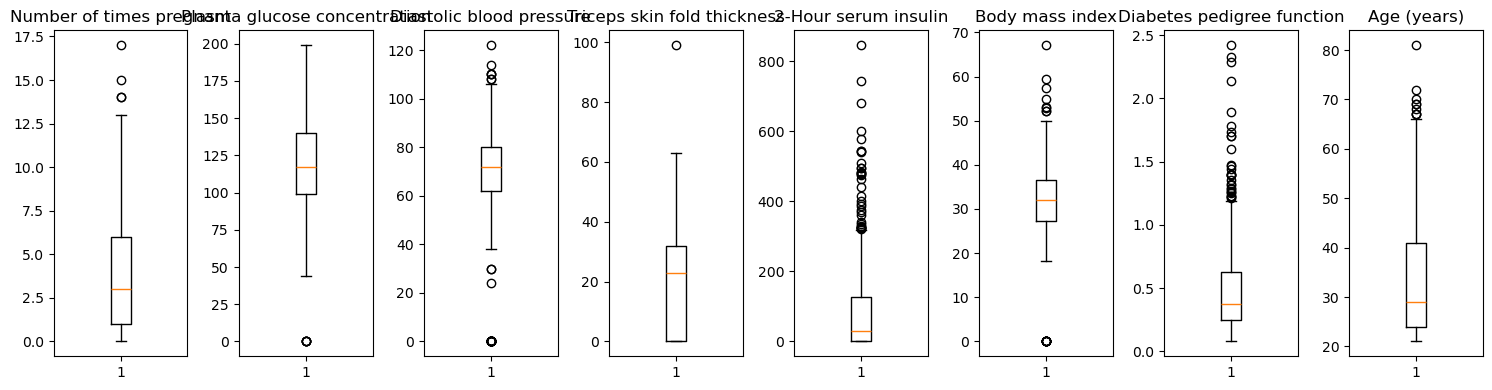

In [134]:
import matplotlib.pyplot as plt
num_cols=["Number of times pregnant","Plasma glucose concentration","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","Body mass index","Diabetes pedigree function","Age (years)"]
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

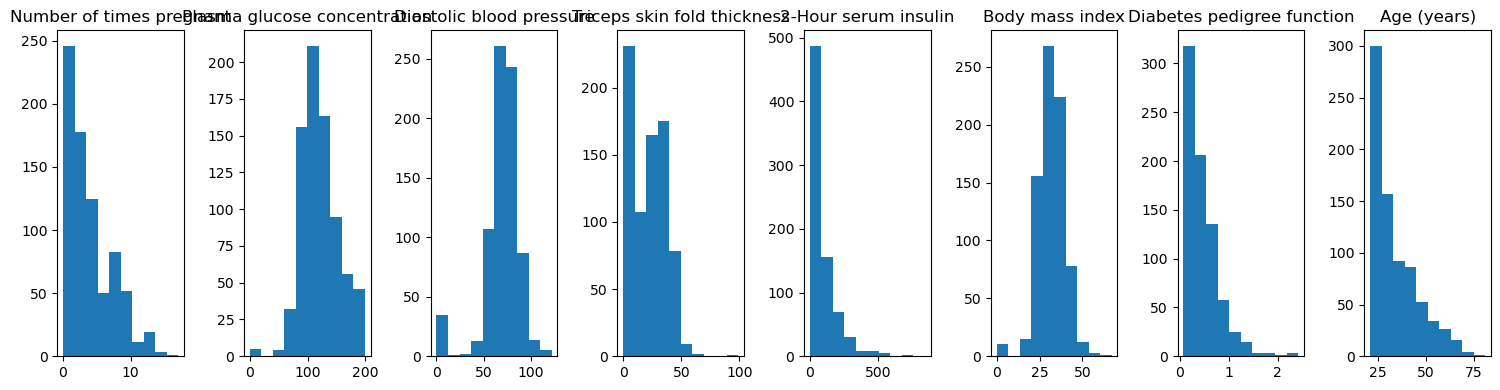

In [135]:
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.hist(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [136]:
from scipy.stats import zscore

num_cols = ["Number of times pregnant","Plasma glucose concentration","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","Body mass index","Diabetes pedigree function","Age (years)"]

z_scores = df[num_cols].apply(zscore)


In [137]:
outlier_mask = (z_scores.abs() > 3)


In [138]:
outlier_mask.sum()


Number of times pregnant         4
Plasma glucose concentration     5
Diastolic blood pressure        35
Triceps skin fold thickness      1
2-Hour serum insulin            18
Body mass index                 14
Diabetes pedigree function      11
Age (years)                      5
dtype: int64

I have used capping as zscore > 3 does not reduce outlier significantly


In [139]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_summary[col] = ((df[col] < lower) | (df[col] > upper)).sum()
    #I have used capping  here
    df[col] = df[col].clip(lower=lower, upper=upper)
outlier_summary


{'Number of times pregnant': np.int64(4),
 'Plasma glucose concentration': np.int64(5),
 'Diastolic blood pressure': np.int64(45),
 'Triceps skin fold thickness': np.int64(1),
 '2-Hour serum insulin': np.int64(34),
 'Body mass index': np.int64(19),
 'Diabetes pedigree function': np.int64(29),
 'Age (years)': np.int64(9)}

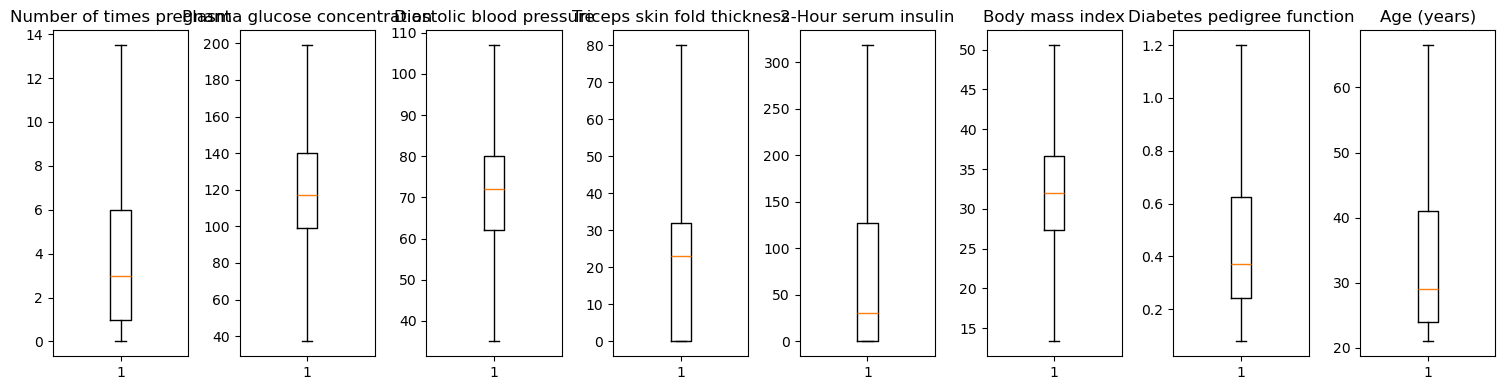

In [140]:
num_cols=["Number of times pregnant","Plasma glucose concentration","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","Body mass index","Diabetes pedigree function","Age (years)"]
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [141]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


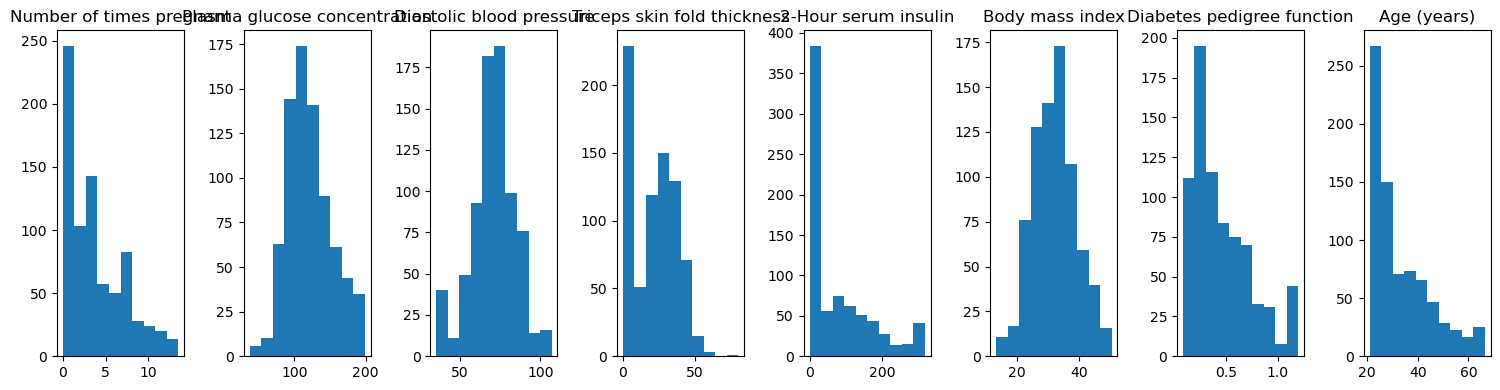

In [142]:
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.hist(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

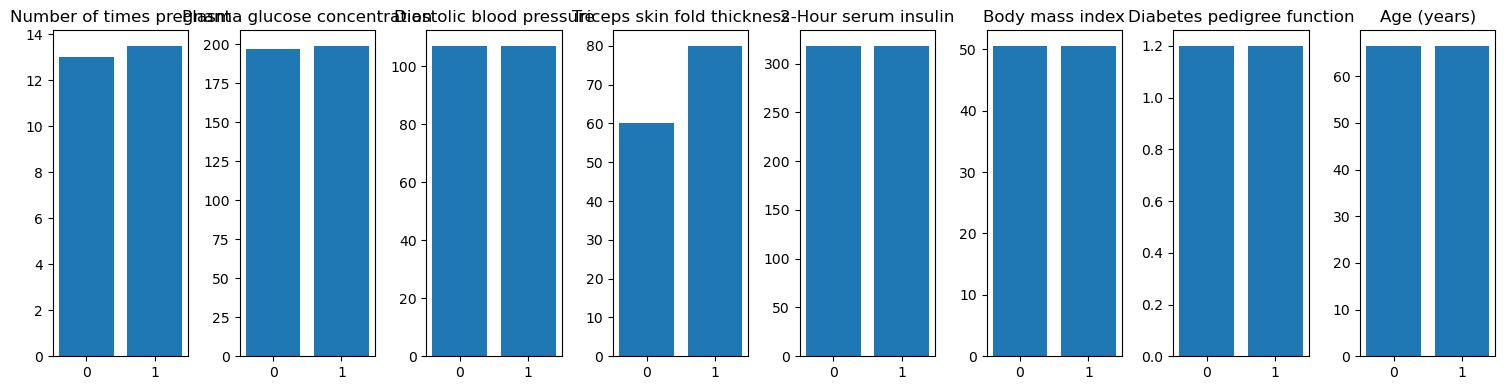

In [143]:
num_cols=["Number of times pregnant","Plasma glucose concentration","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","Body mass index","Diabetes pedigree function","Age (years)"]
fig, axes = plt.subplots(1, len(num_cols), figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    ax.bar(df["Outcome"],df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()


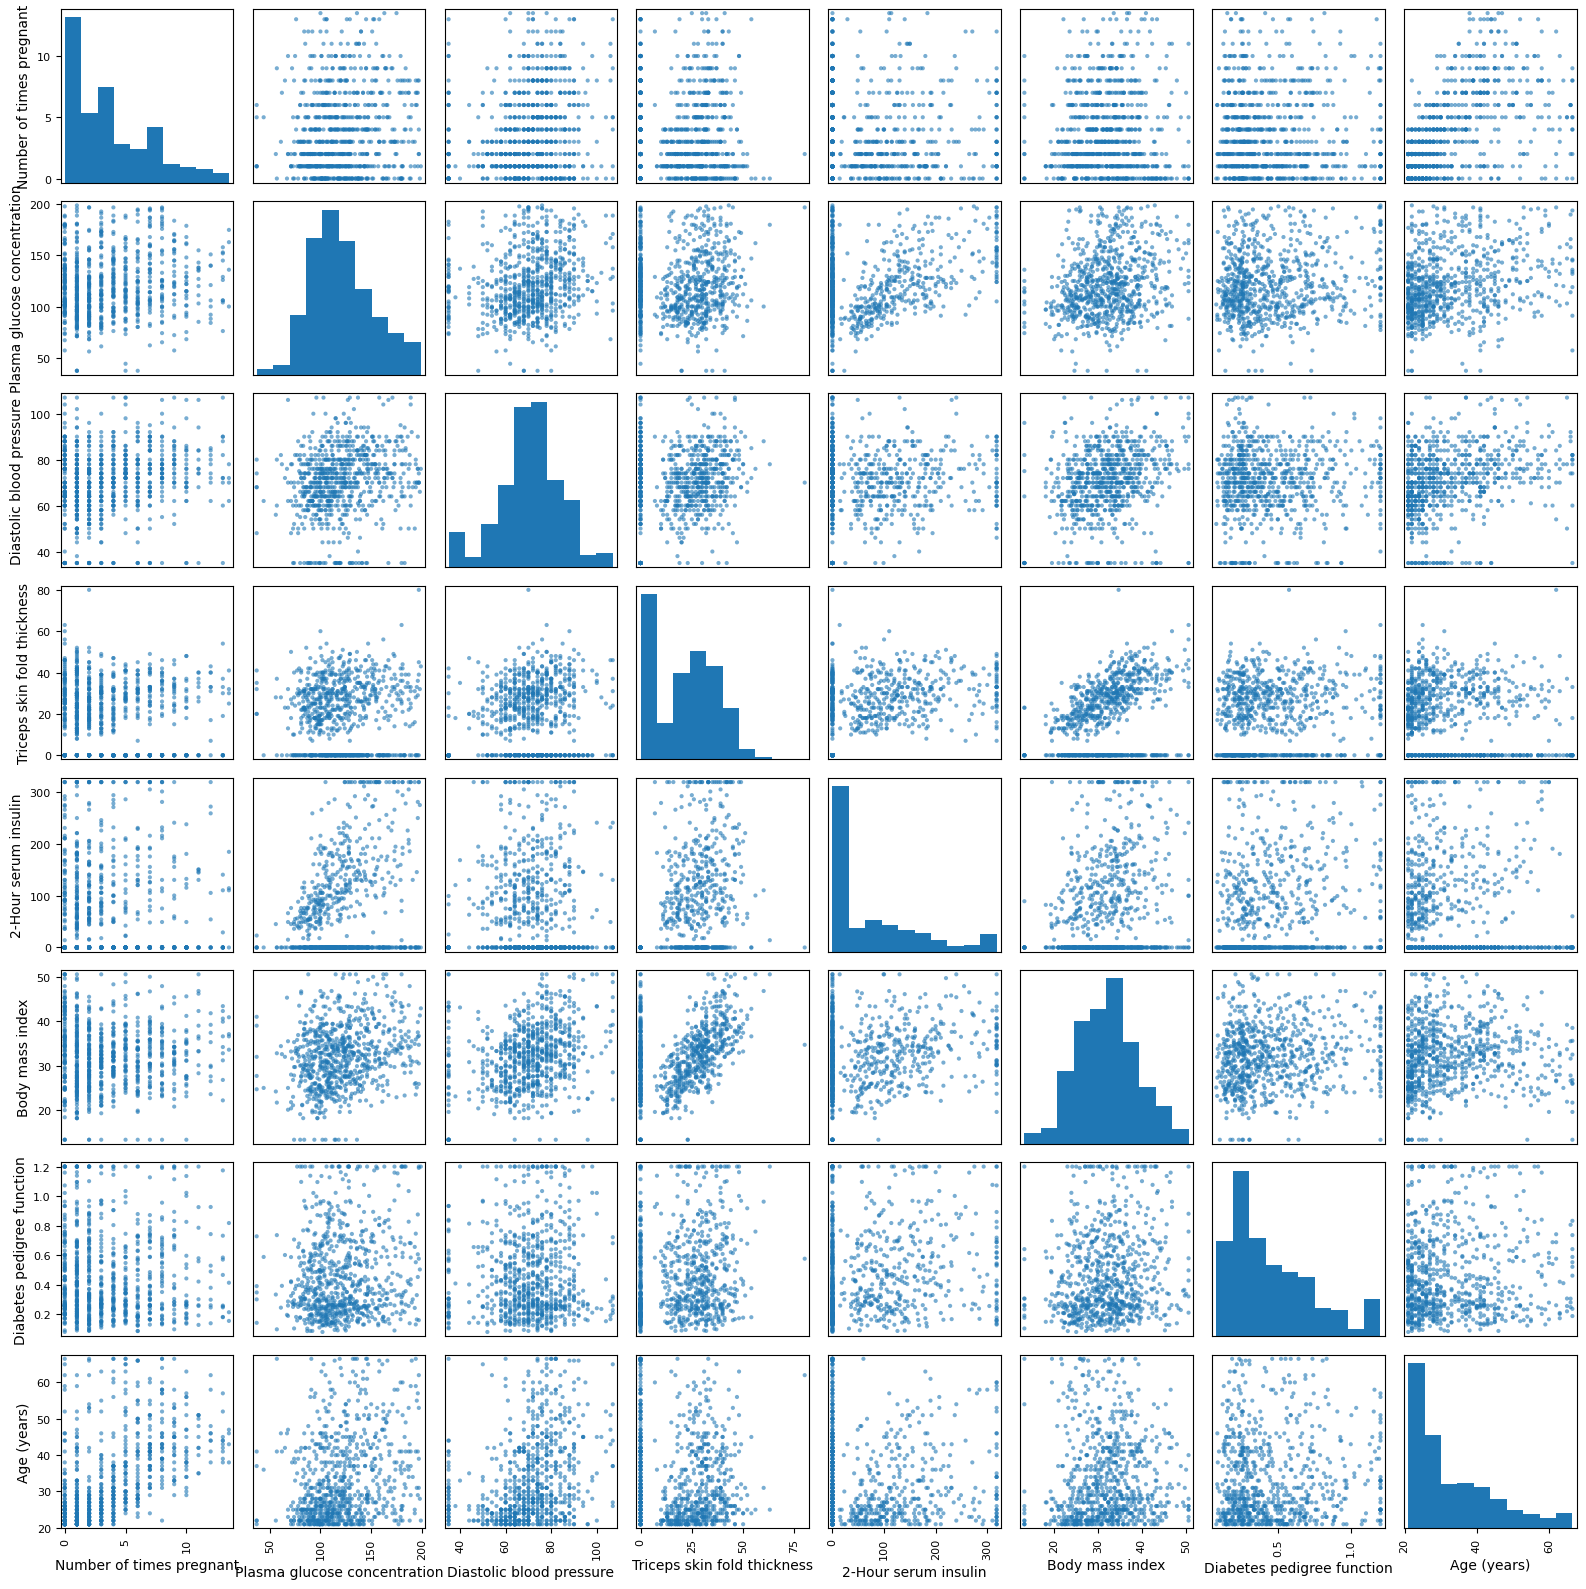

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(
    df[num_cols],
    figsize=(16, 16),
    diagonal="hist",
    alpha=0.6
)

plt.tight_layout()
plt.show()


<Axes: >

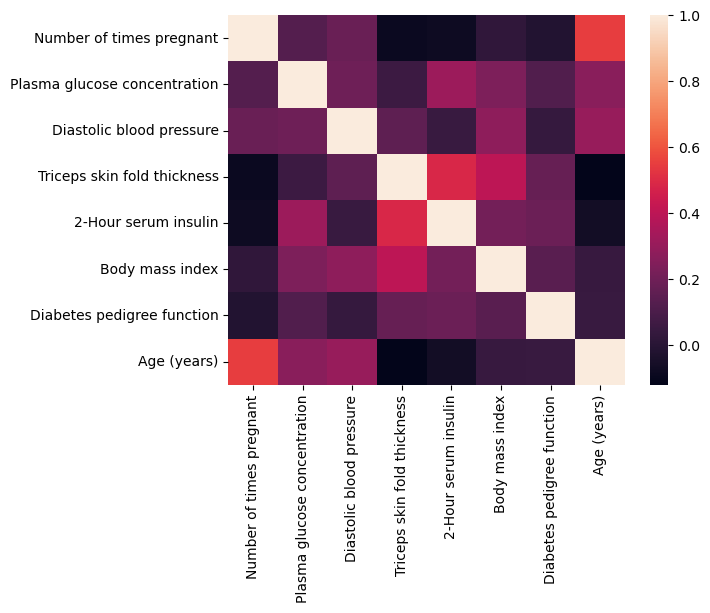

In [145]:
import seaborn as sns
cor=df[num_cols].corr()
sns.heatmap(cor)


In [146]:
from sklearn.model_selection import train_test_split
X = df[["Number of times pregnant","Plasma glucose concentration","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","Body mass index","Diabetes pedigree function","Age (years)"]] 
y = df["Outcome"] 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,      # 70% train, 30% test
    random_state=42    
)


In [147]:
from sklearn.tree import DecisionTreeClassifier

dt_pruned = DecisionTreeClassifier(
    #max_depth=6,
    #min_samples_split=20,
    #min_samples_leaf=6,
    random_state=42
)

dt_pruned.fit(X_train, y_train)


dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [148]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred  = dt.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy :", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Train accuracy: 1.0
Test accuracy : 0.696969696969697

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       151
         1.0       0.55      0.66      0.60        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231


Confusion Matrix (Test):
[[108  43]
 [ 27  53]]


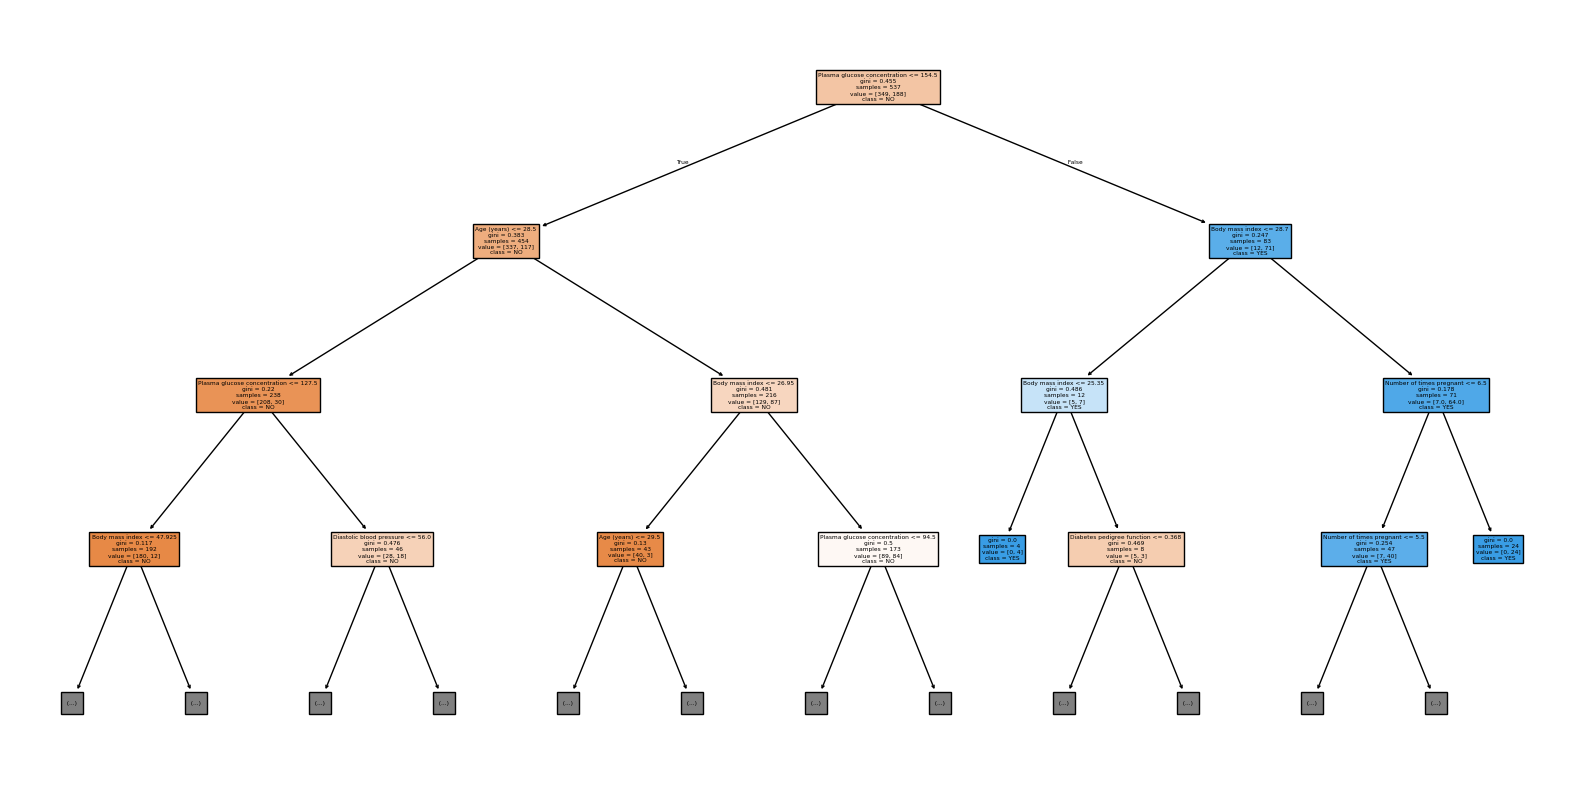

In [149]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["NO", "YES"],
    filled=True,
    max_depth=3   # limit depth for readability
)
plt.show()
